In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [21]:
item_db = pd.read_csv("all_items.csv")

In [22]:
item_db

,0,1,2,3,4,5,6,7,8,9,10
0,A,B,C,D,E,F,G,H,I,J,K
1,L,M,N,O,P,Q,R,S,T,U,V
2,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG
3,AH,NaN,AI,NaN,NaN,AJ,NaN,NaN,AK,NaN,AL


In [58]:
item_dict={}
for shelf in item_db:
    for item in item_db[shelf]:
        if shelf != np.nan:
            item_dict[item] = int(shelf)

In [59]:
item_dict

{'A': 0,
 'L': 0,
 'W': 0,
 'AH': 0,
 'B': 1,
 'M': 1,
 'X': 1,
 nan: 9,
 'C': 2,
 'N': 2,
 'Y': 2,
 'AI': 2,
 'D': 3,
 'O': 3,
 'Z': 3,
 'E': 4,
 'P': 4,
 'AA': 4,
 'F': 5,
 'Q': 5,
 'AB': 5,
 'AJ': 5,
 'G': 6,
 'R': 6,
 'AC': 6,
 'H': 7,
 'S': 7,
 'AD': 7,
 'I': 8,
 'T': 8,
 'AE': 8,
 'AK': 8,
 'J': 9,
 'U': 9,
 'AF': 9,
 'K': 10,
 'V': 10,
 'AG': 10,
 'AL': 10}

In [62]:
store = nx.Graph()

In [63]:
store.add_node(0,pos=(1,1))
store.add_node(1,pos=(1,0.5))
store.add_node(2,pos=(1,0))
store.add_node(3,pos=(2,0.5))
store.add_node(4,pos=(2,0))
store.add_node(5,pos=(3,1))
store.add_node(6,pos=(3.5,0.5))
store.add_node(7,pos=(4,0))
store.add_node(8,pos=(4,2))
store.add_node(9,pos=(5,2))
store.add_node(10,pos=(5,0))

In [64]:
store.add_edge(0,1,weight=1)
store.add_edge(1,2,weight=1)
store.add_edge(1,3,weight=1)
store.add_edge(3,4,weight=1)
store.add_edge(3,7,weight=2)
store.add_edge(3,6,weight=1)
store.add_edge(3,5,weight=2)
store.add_edge(5,6,weight=1)
store.add_edge(5,8,weight=2)
store.add_edge(6,8,weight=3)
store.add_edge(7,10,weight=1)
store.add_edge(8,9,weight=1)
store.add_edge(8,7,weight=4)


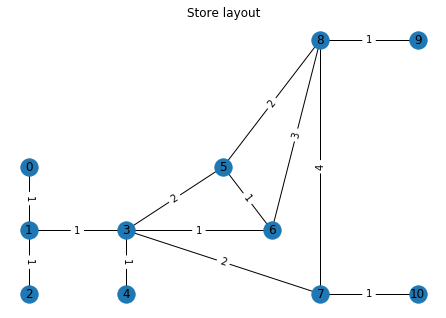

In [92]:
pos=nx.get_node_attributes(store,'pos')
nx.draw(store,pos,with_labels=True)
labels = nx.get_edge_attributes(store,'weight')
nx.draw_networkx_edge_labels(store,pos,edge_labels=labels)

plt.axis('off')
plt.title("Store layout")
plt.show()

In [174]:
user_items = pd.read_csv("user_inp.csv",header=None)

In [175]:
user_items

,0,1,2,3
0,A,B,AA,AJ


In [176]:
item_arr = user_items.iloc[0].values

In [177]:
shelfs = []
for item in item_arr:
    shelfs.append(int(item_dict[item]))

In [178]:
shelfs = np.unique(shelfs)

In [180]:
shelfs = np.delete(shelfs,np.argwhere(shelfs==0))

In [182]:
start = 0
shlf = []
l = 100
for i,s in enumerate(shelfs):
    l1 = nx.shortest_path_length(store,start,s,weight="weight")
    if l1 < l:
        l = l1
        shlf = []
        shlf.append((i,s))
    elif l1 == l:
        shlf.append((i,s))
comb = [0]
while len(shelfs)!=0:
    temp_shlfs = []
    temp_ls = []
    ss = []
    for i,s in shlf:
        temp_l = 100
        temp_shlf = []
        shelfs = np.delete(shelfs,i)
        for i1,s1 in enumerate(shelfs):
            l1 = nx.shortest_path_length(store,s,s1,weight="weight")
            if l1<temp_l:
                temp_shlf = []
                temp_l = l1
                temp_shlf.append((i1,s1))
            elif l1 == temp_l:
                temp_shlf.append((i1,s1))
        temp_ls.append(temp_l)
        temp_shlfs.append(temp_shlf)
        ss.append(s)
    i = np.argmax(temp_ls)
    shlf = temp_shlfs[i]
    comb.append(ss[i])
                

In [183]:
path = []
for i in range(len(comb)-1):
    p = nx.shortest_path(store,comb[i],comb[i+1],weight="weight")
    path += p[1:]
path = [0] + path
return_path =  nx.shortest_path(store,comb[-1],0,weight="weight")


In [184]:
print("Path: {}\nReturn path: {}".format(path,return_path))

Path: [0, 1, 3, 4, 3, 5]
Return path: [5, 3, 1, 0]


In [185]:
path_edges = set(zip(path,path[1:]))
r_path_edges = set(zip(return_path,return_path[1:]))

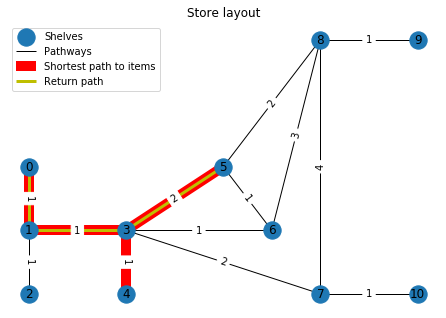

In [188]:
pos=nx.get_node_attributes(store,'pos')
nx.draw(store,pos,with_labels=True)
labels = nx.get_edge_attributes(store,'weight')
nx.draw_networkx_edge_labels(store,pos,edge_labels=labels)
nx.draw_networkx_edges(store,pos,edgelist=path_edges,edge_color='r',width=10)
nx.draw_networkx_edges(store,pos,edgelist=r_path_edges,edge_color='y',width=3)

plt.axis('off')
plt.legend(['Shelves','Pathways','Shortest path to items','Return path'])
plt.title("Store layout")
plt.show()